# Módulo de estatística 

## Projeto A - Análise do dataset "Wine Quality"

**Turma 767**
>*Squad*:<br>
    - Bruna Monteiro<br>
    - Bruno Perrota<br>
    - Caio Cunha<br>
    - Daniel Pinheiro<br>
    - Ivan Cristian<br>
    


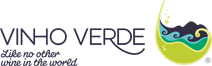

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality
    
Obs.: juntar os arquivos de vinho branco e tinto em um único dataframe

### Introdução

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


### Features
Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

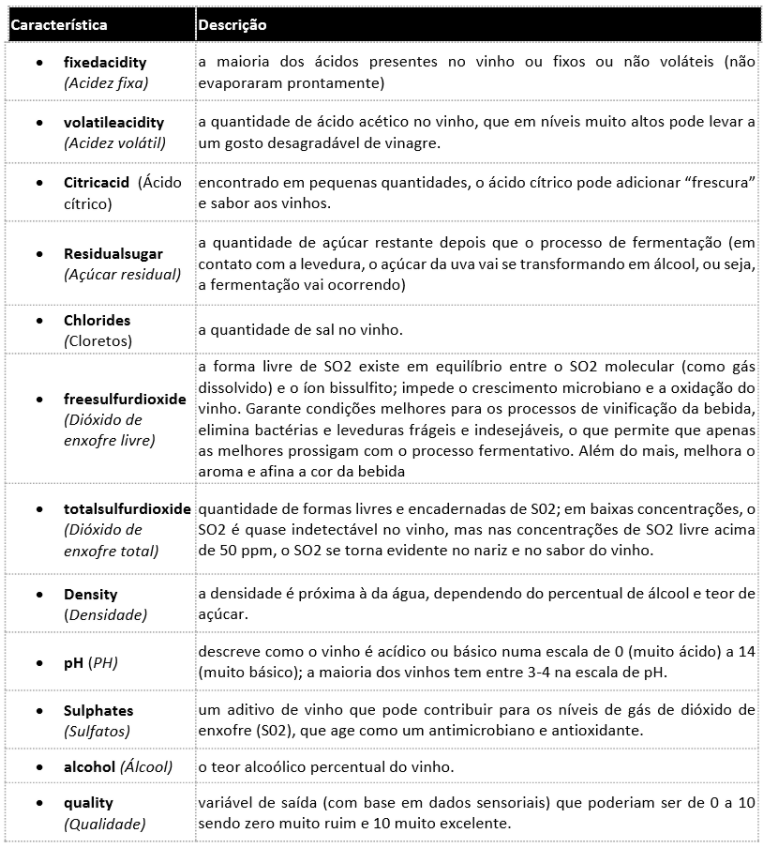

## Etapas do projeto:

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Exclusão de outliers, caso necessário (sempre explicando a opção)

### Etapa 2

**Regressão Linear**

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

# Resolução

In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#fazendo a leitura dos arquivos CSV
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

### EDA - Análise exploratória de dados

- **Analisando e alterando a estrutura do dataframe**

In [3]:
#concatenando(juntando os dois arquivos)
df = pd.concat([red, white])

In [4]:
#Verificando os 5 primeiros elementos
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#6497 linhas e 12 colunas
df.shape 

(6497, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
#não possui dados faltantes
#as 12 variáveis são numéricas
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


- **Conferindo a existência de dados duplicados**

In [8]:
#Número de dados duplicados
df[df.duplicated()].count()

#Retirando dados duplicados
df.drop_duplicates(inplace=True)

#Nova estrutura do dataframe
df.shape

(5318, 12)

- **Análise univariada das features**

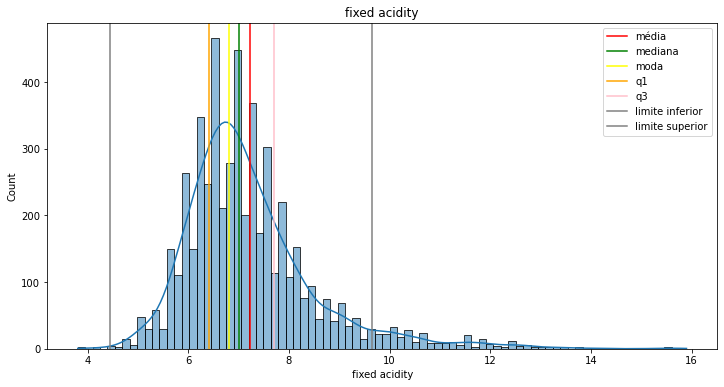

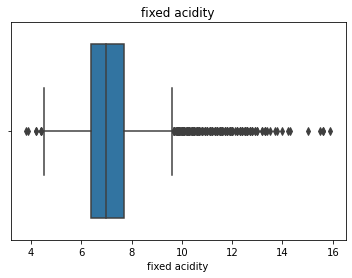

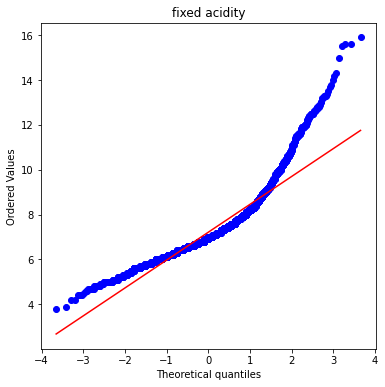

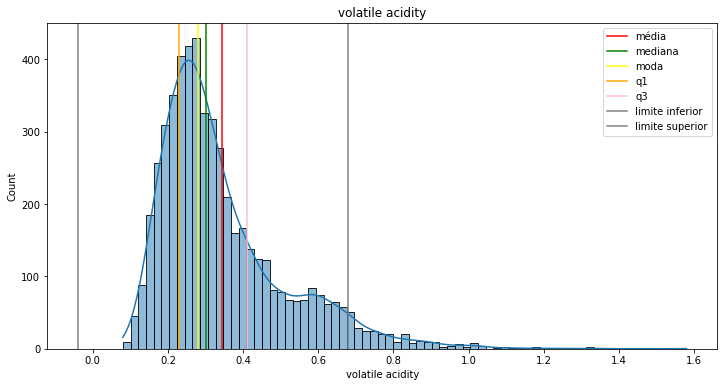

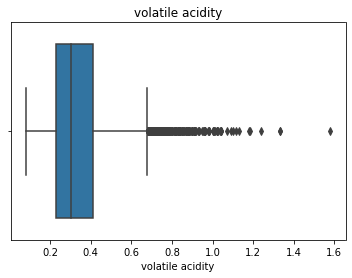

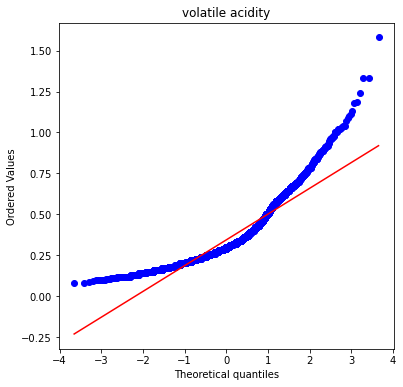

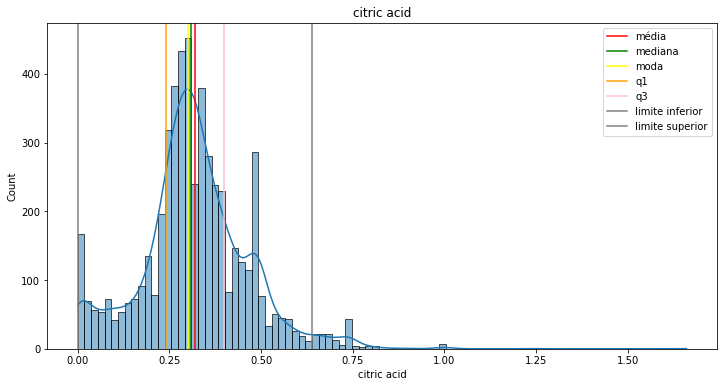

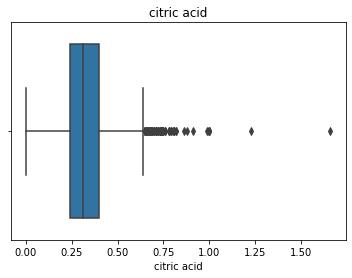

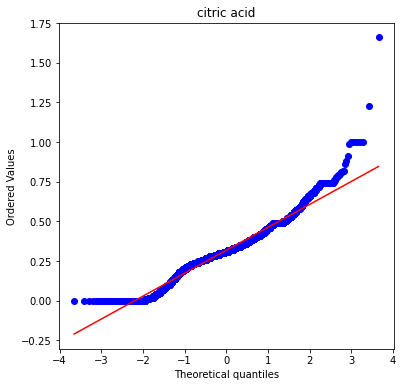

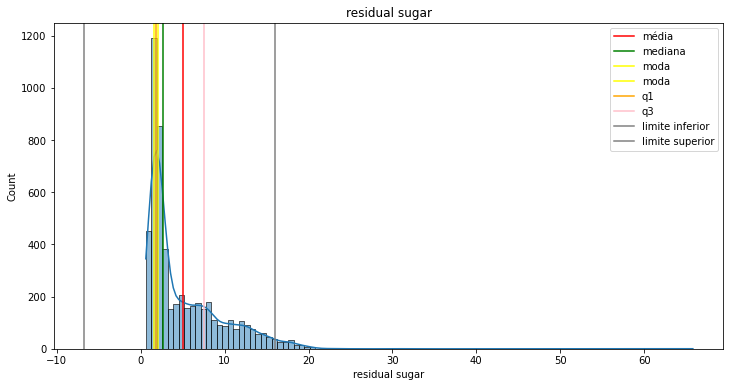

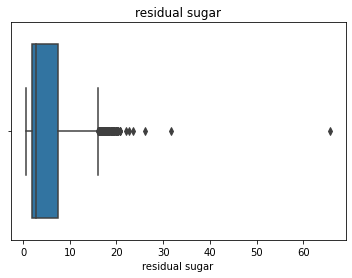

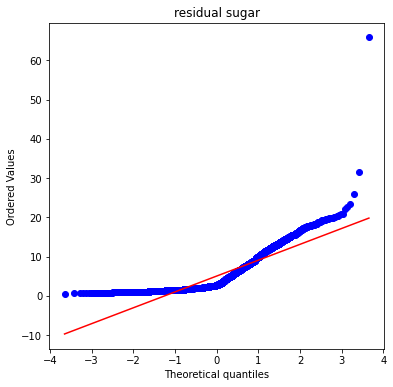

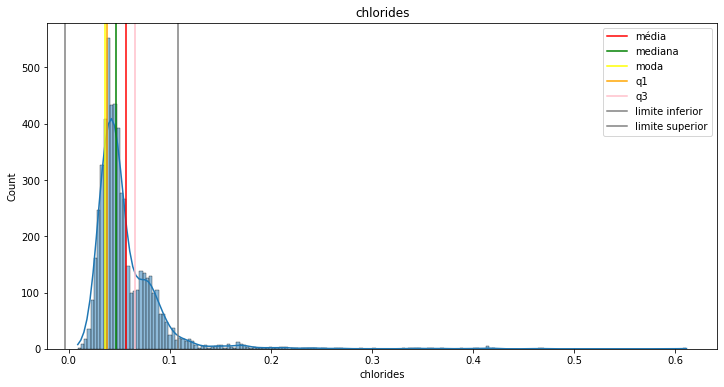

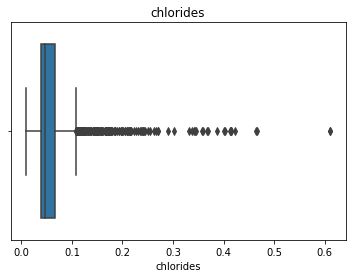

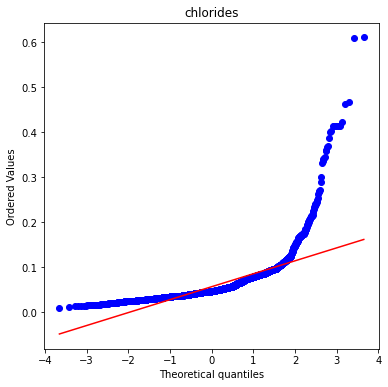

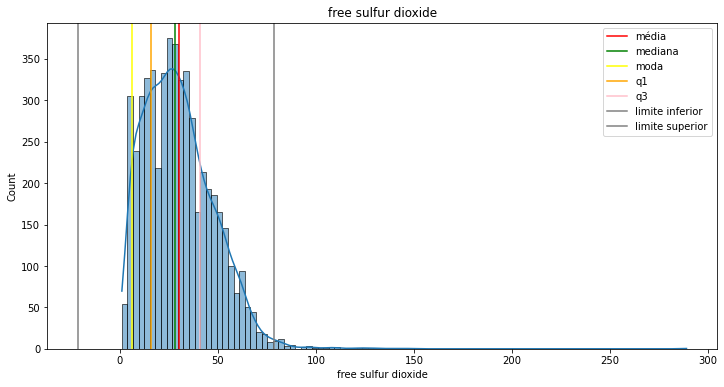

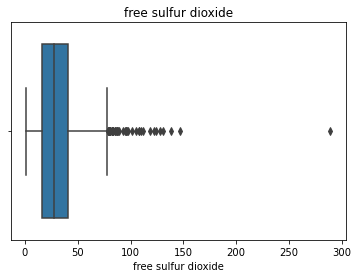

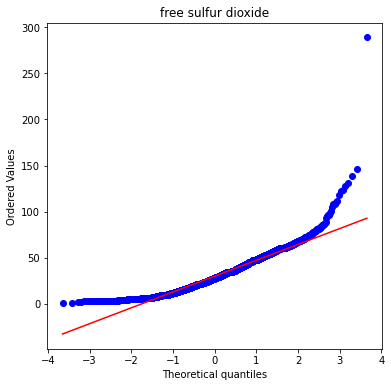

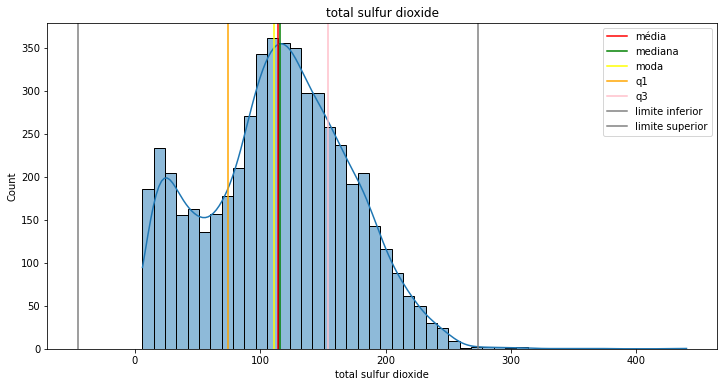

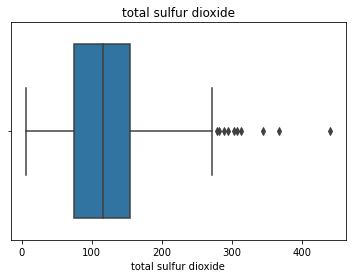

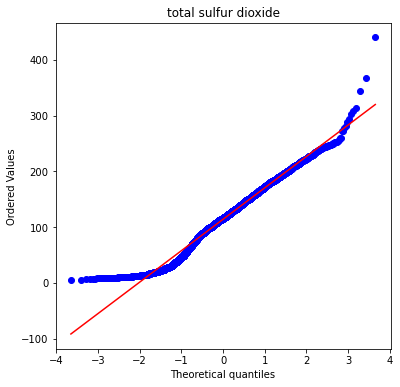

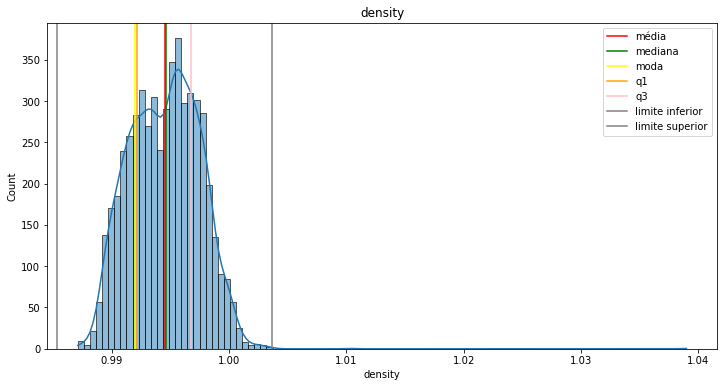

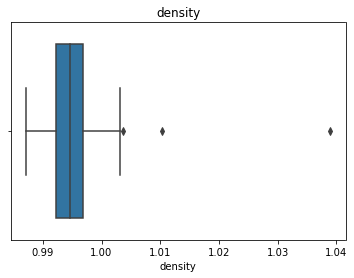

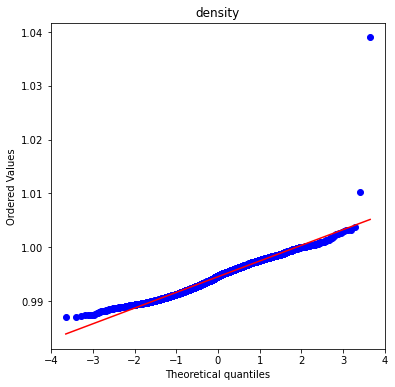

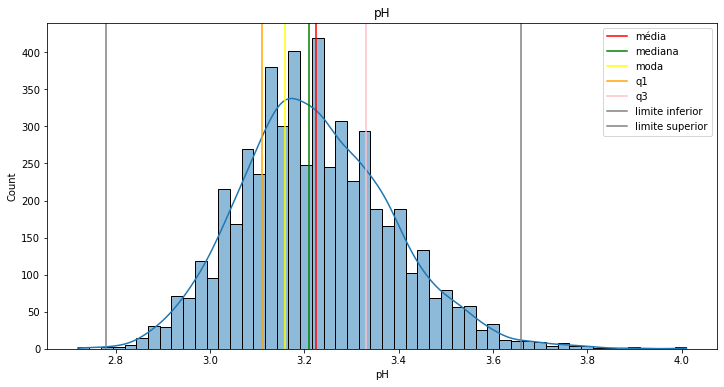

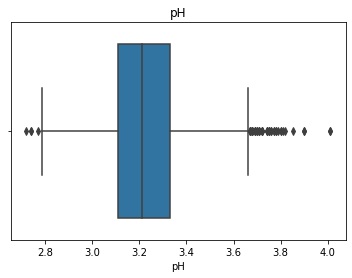

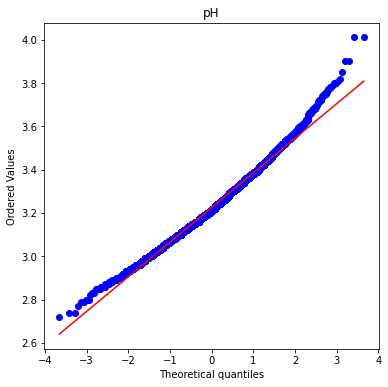

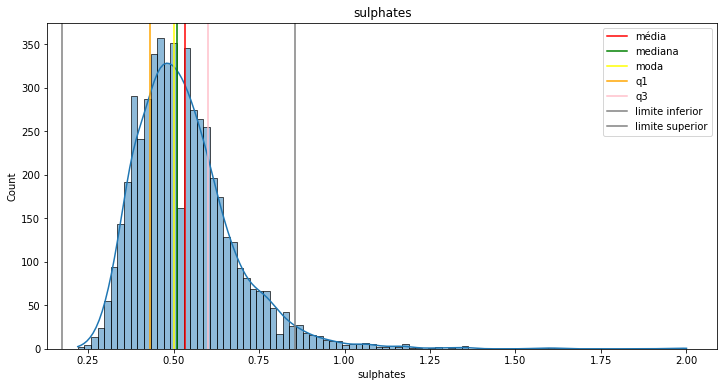

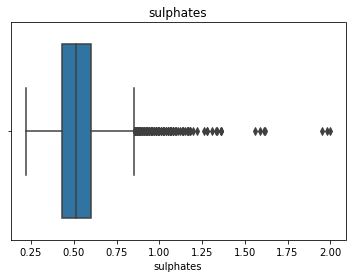

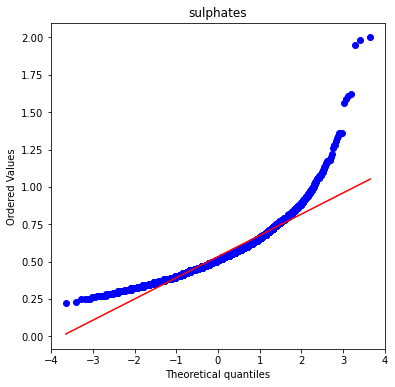

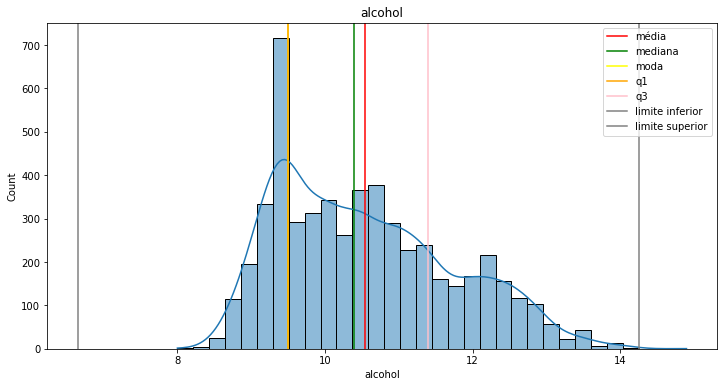

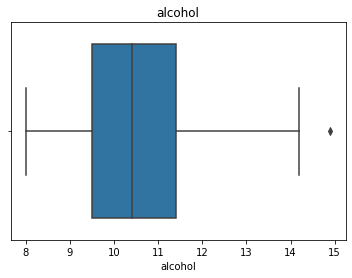

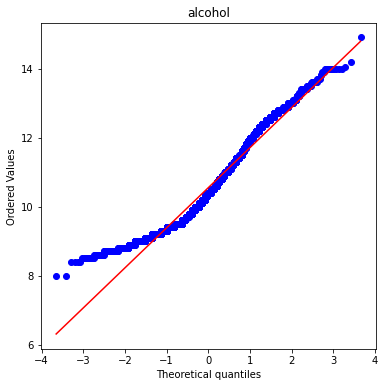

In [9]:
#Analisando graficamente as features
for item in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    
    plt.figure(figsize=(12,6))
    sns.histplot(df[item], kde=True)
    # plotando média
    plt.axvline(x=df[item].mean(), color="red", label="média")

    # plotando a mediana
    plt.axvline(df[item].median(), color="green", label="mediana")

    # Loop para plotar as modas
    for i in range(df[item].mode().shape[0]):
        plt.axvline(df[item].mode()[i], color="yellow", label="moda")

    plt.axvline(df[item].quantile(0.25), color="orange", label="q1")
    plt.axvline(df[item].quantile(0.75), color="pink", label="q3")

    IQR = df[item].quantile(0.75) - df[item].quantile(0.25)
    plt.axvline(df[item].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
    plt.axvline(df[item].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

    plt.legend()
    plt.title(item)
    plt.show()
    
    
    sns.boxplot(df[item])
    plt.title(item)
    plt.show()
    
    from scipy import stats
    fig, ax = plt.subplots(figsize=(6, 6))

    stats.probplot(df[item], plot=ax)
    plt.title(item)
    plt.show()

> - Obs: Constatado bastante presenças de outliers podendo interferir no resultado do R2

- **Analisando o target(variável resposta)**

In [10]:
#Verificando os valores únicos de qualidade
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [11]:
#calculando a frequencia(%) dos valores de qualidade em percentual
df['quality'].value_counts(normalize='True') * 100

6    43.681835
5    32.925912
7    16.077473
4     3.873637
8     2.783001
3     0.564122
9     0.094020
Name: quality, dtype: float64

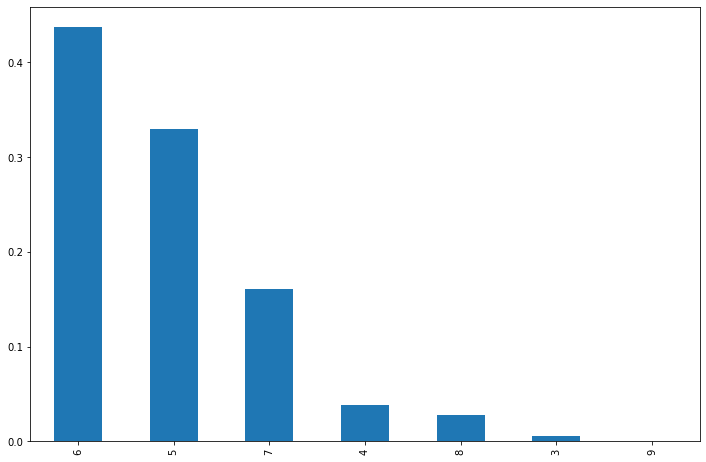

In [12]:
#Visualizando a frequência(%) através de um gráfico de barras
df['quality'].value_counts(normalize='True').plot(kind = 'bar', figsize = (12,8));

In [13]:
#Quantidade de vinhos por categoria de qualidade
df['quality'].value_counts()

6    2323
5    1751
7     855
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

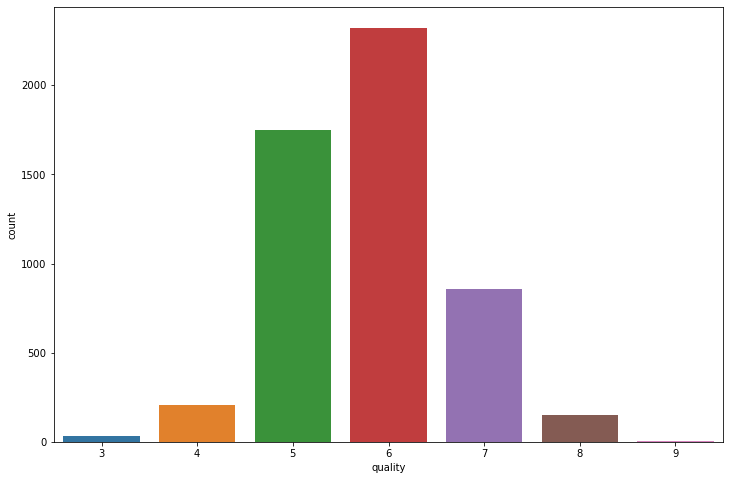

In [14]:
#Visualizando a distribuição através de um histograma
plt.figure(figsize=(12,8))
sns.countplot(x='quality', data=df)
plt.show()

- **Criando uma feature de classificação**

In [15]:
#Criando uma feature classificando o vinho como 1 quando o vinho for bom (quality >= 6) ou 0 quando o vinho for ruim(quality < 6)
df['classification'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


- **Análise multivariada**

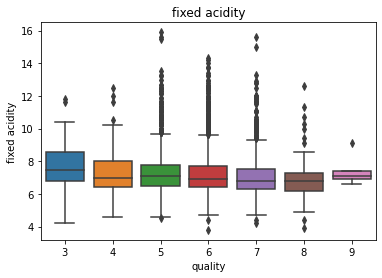

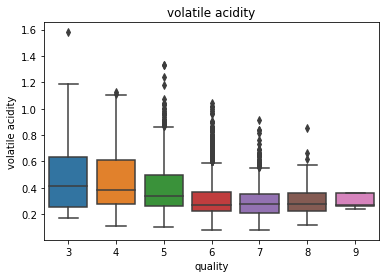

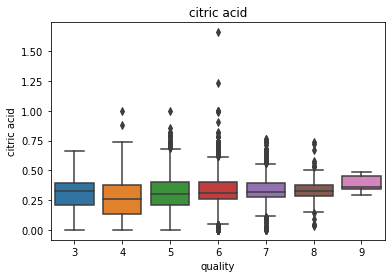

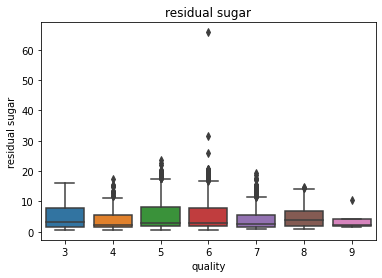

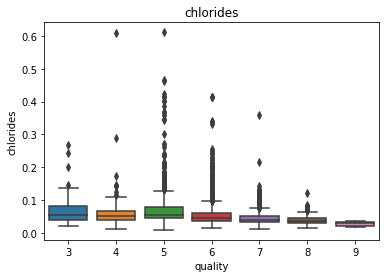

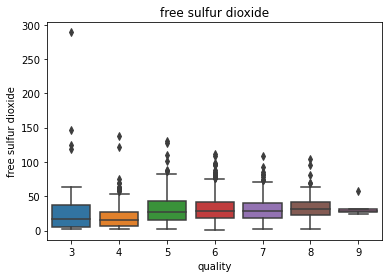

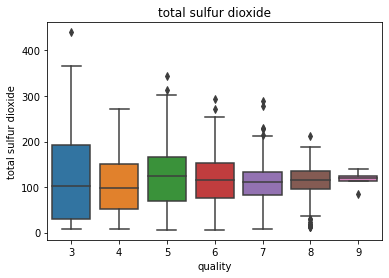

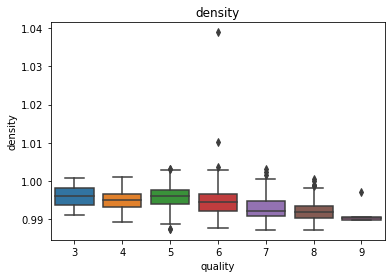

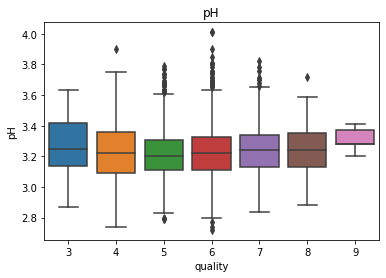

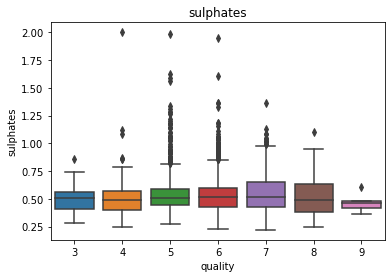

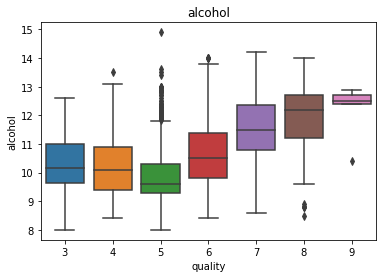

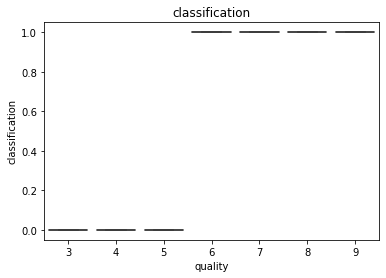

In [16]:
#Analisando a distribuição das features dentro do target
for item in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'classification']:
    sns.boxplot(data=df, y = item, x = 'quality')
    plt.title(item)
    plt.show()

- **Insights**

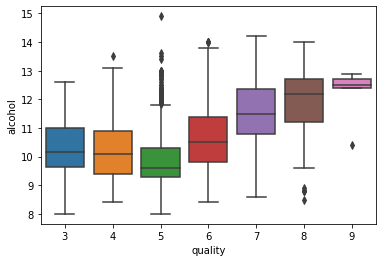

In [17]:
#Nota-se que a partir da qualidade 6 existe uma correlação maior do teor alcóolico com a qualidade do vinho
#Então quanto maior o teor alcóolico melhor a qualidade do vinho
#Nota-se também a presença de bastante outliers superiores no teor alcóolico dos vinhos de qualidade 5 e inferiores nos vinhos de qualidade 8
sns.boxplot(x='quality', y='alcohol', data = df);

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

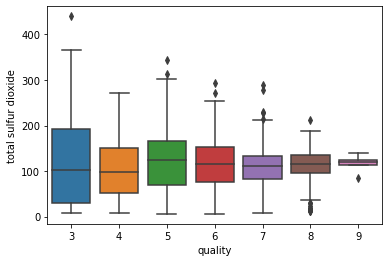

In [18]:
#Nota-se no dioxido de enxofre total,que o primeiro quartil vai aumentando e o terceiro quarti vai diminuindo na medida que vai aumentando aqualidade do vinho
#Ou seja, o IQR da variável 'total sulfur dioxide' em relação a 'quality' vai diminuindo de acordo com o aumento da qualidade do vinho
#Criando uma coluna com o IQR dessa variável em relação que será bem correlacionada com a qualidade do vinho
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = df)

In [19]:
#Constatando o insight mencionado acima através de números, onde foi visualizado uma forte correlação negativa
#Quanto maior a qualidade do vinho menor o IQR da coluna 'total sulfur dioxide'
IQR = df.groupby(['quality'])[['total sulfur dioxide']].quantile(0.75) - df.groupby(['quality'])[['total sulfur dioxide']].quantile(0.25)
IQR

,total sulfur dioxide
quality,
3,163.25
4,98.25
5,97.00
6,78.00
7,52.00
8,40.50
9,11.00


In [20]:
#Criando uma coluna 'IQR total sulfur dioxide' no dataframe que vai representar o IQR do dióxido de enxofre em relação a qualidade do vinho
df['IQR total sulfur dioxide'] = df['quality'].apply(lambda x: 163.25 if x == 3 
                                else 98.25 if x == 4
                                else 97.00 if x == 5
                                else 78.00 if x == 6
                                else 52.00 if x == 7
                                else 40.50 if x == 8
                                else 11.00)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,IQR total sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,97.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,97.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,97.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,78.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,97.0


In [21]:
df['IQR total sulfur dioxide'].value_counts()

78.00     2323
97.00     1751
52.00      855
98.25      206
40.50      148
163.25      30
11.00        5
Name: IQR total sulfur dioxide, dtype: int64

- **Tentando encontrar alguma correlação entre as variáveis e a qualidade do vinho.**

In [22]:
#métricas estatísticas(média, desvio padrão, quartil, valor mínimo)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,IQR total sulfur dioxide
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600,0.626363,80.234487
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715,0.483814,17.968105
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,11.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000,78.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000,1.000000,78.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000,97.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,163.250000


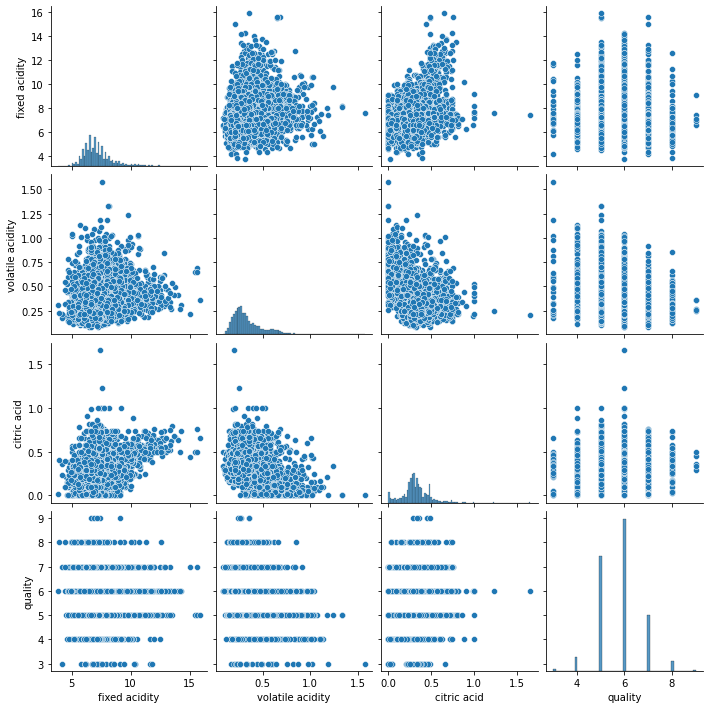

In [23]:
#Gráfico de dispersão comparando as features com a target('quality')
sns.pairplot(data=df[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']]);

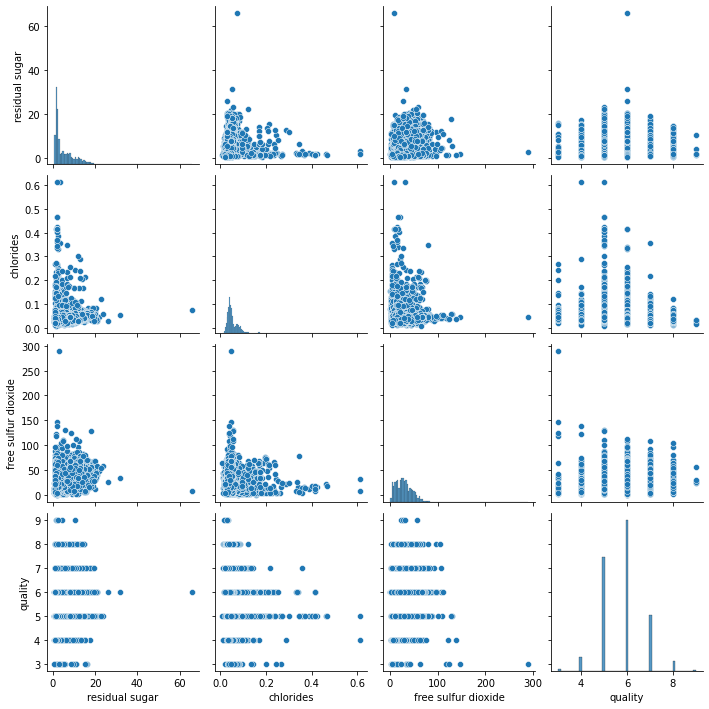

In [24]:
#Gráfico de dispersão comparando as features com a target('quality')
sns.pairplot(data = df[['residual sugar', 'chlorides', 'free sulfur dioxide','quality' ]])


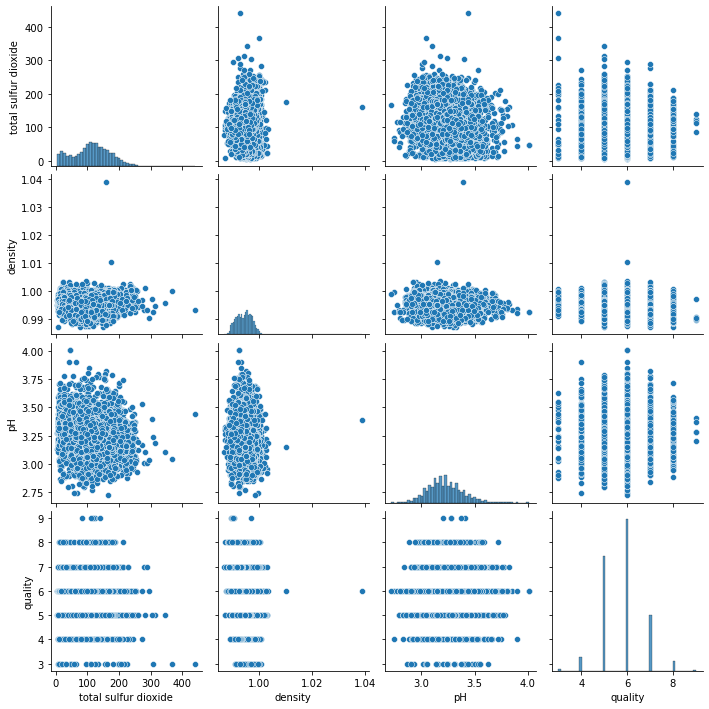

In [25]:
#Gráfico de dispersão comparando as features com a target('quality')
sns.pairplot(data = df[['total sulfur dioxide', 'density','pH','quality' ]])

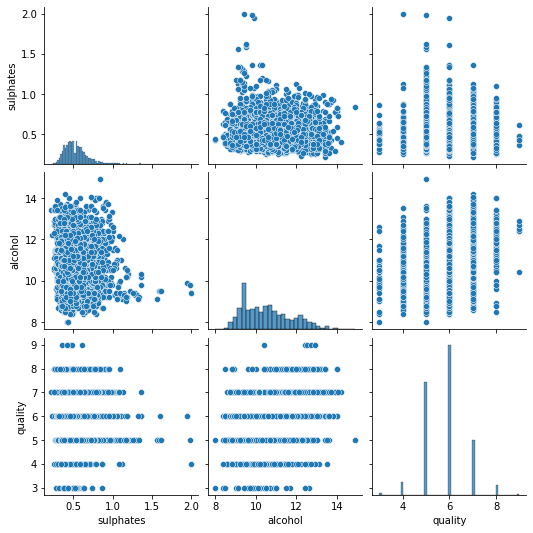

In [26]:
#Gráfico de dispersão comparando as features com a target('quality')
sns.pairplot(data = df[['sulphates', 'alcohol', 'quality' ]])

In [27]:
#Analisando as correlações entre as features
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,IQR total sulfur dioxide
fixed acidity,1.000000,0.214595,0.330225,-0.104641,0.288843,-0.281375,-0.327462,0.478148,-0.271094,0.304728,-0.102696,-0.080190,-0.072166,0.080408
volatile acidity,0.214595,1.000000,-0.384395,-0.163896,0.367573,-0.348865,-0.400715,0.308375,0.246837,0.227645,-0.065510,-0.265354,-0.270158,0.248311
citric acid,0.330225,-0.384395,1.000000,0.146078,0.055107,0.131113,0.194888,0.094663,-0.344675,0.059061,-0.005572,0.097926,0.086933,-0.088738
residual sugar,-0.104641,-0.163896,0.146078,1.000000,-0.123302,0.399090,0.487593,0.520867,-0.234443,-0.174946,-0.305334,-0.056824,-0.047888,0.073923
chlorides,0.288843,0.367573,0.055107,-0.123302,1.000000,-0.186518,-0.269896,0.371665,0.025914,0.404905,-0.269516,-0.201960,-0.187353,0.208328
free sulfur dioxide,-0.281375,-0.348865,0.131113,0.399090,-0.186518,1.000000,0.720576,0.006360,-0.141968,-0.198075,-0.169887,0.054199,0.047096,-0.024746
total sulfur dioxide,-0.327462,-0.400715,0.194888,0.487593,-0.269896,0.720576,1.000000,0.006677,-0.223000,-0.275877,-0.248942,-0.050183,-0.049269,0.066229
density,0.478148,0.308375,0.094663,0.520867,0.371665,0.006360,0.006677,1.000000,0.034377,0.282494,-0.667861,-0.326301,-0.287191,0.339458
pH,-0.271094,0.246837,-0.344675,-0.234443,0.025914,-0.141968,-0.223000,0.034377,1.000000,0.168287,0.097392,0.039789,0.036225,-0.044244
sulphates,0.304728,0.227645,0.059061,-0.174946,0.404905,-0.198075,-0.275877,0.282494,0.168287,1.000000,-0.017166,0.042040,0.035561,-0.040794


<AxesSubplot:>

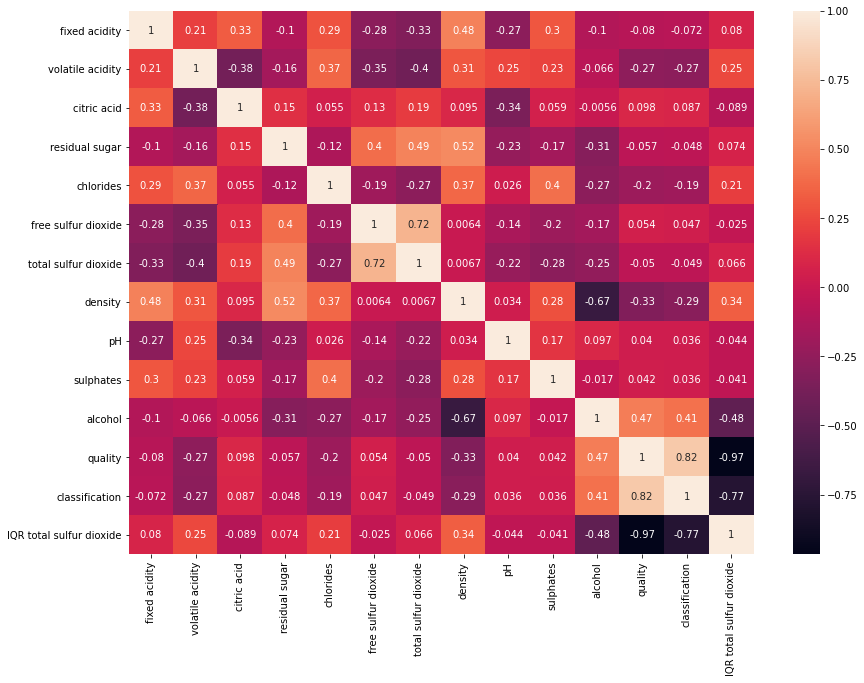

In [28]:
#Visualizando através de um mapa de calor
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

>- Conclusão:
    - Verificando as correlações em relação a qualidade do vinho, vemos o **alcohol** e a **classification** as que mais se correlacionam positivamente com índices 0,47 e 0,82 e a **density** e o **IQR** as que mais se correlacionam negativamente com índices -0,33 e - 0.97.


- **Criando o modelo de Regressão Linear apenas com as variáveis originais do dataframe**

In [29]:
# Speração dos dados entre variáveis(features) e resposta(target)
X = df.drop(['quality', 'classification', 'IQR total sulfur dioxide'], axis = 1) #eliminando a target do X
y = df['quality']

In [30]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [31]:
#Normalização
# Define como será feito a normalização
scaler = StandardScaler()

In [32]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [33]:
#importando bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [34]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [35]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [36]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [37]:
# Visualizando as predições
y_pred

array([6.48036326, 6.10723092, 6.16882075, ..., 5.25541772, 5.46524321,
       6.74445394])

- **AVALIAÇÃO**

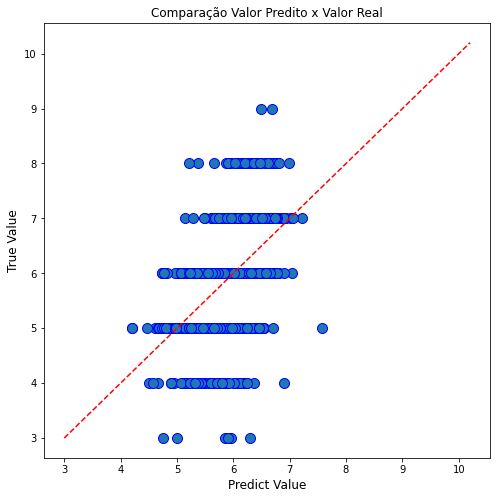

In [38]:
#Gráfico comparando o Valor Real com o Predito
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()


In [39]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    0.552
Erro Quadrãtico Médio:  0.515
R^2:                    0.312


- **Fazendo o feature importance**

In [40]:
# Determiando o Feature Importance
coefs = linreg.coef_

# Cria as listas
list_columns = X_train.columns
list_feature = []
list_score = []

# atrela cada feature a um score
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Monta um dicionário
dictionary = {'Features': list_feature,
              'Scores': list_score}

# converte o dicionário em dataframe
df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Plot das 10 principais features
df_features.head(13)

,Features,Scores
0,alcohol,0.314900
1,residual sugar,0.173230
2,free sulfur dioxide,0.124209
3,sulphates,0.118261
4,pH,0.087447
5,fixed acidity,0.079227
6,citric acid,0.025236
7,chlorides,-0.026588
8,total sulfur dioxide,-0.150166
9,density,-0.177785


<AxesSubplot:xlabel='Scores', ylabel='Features'>

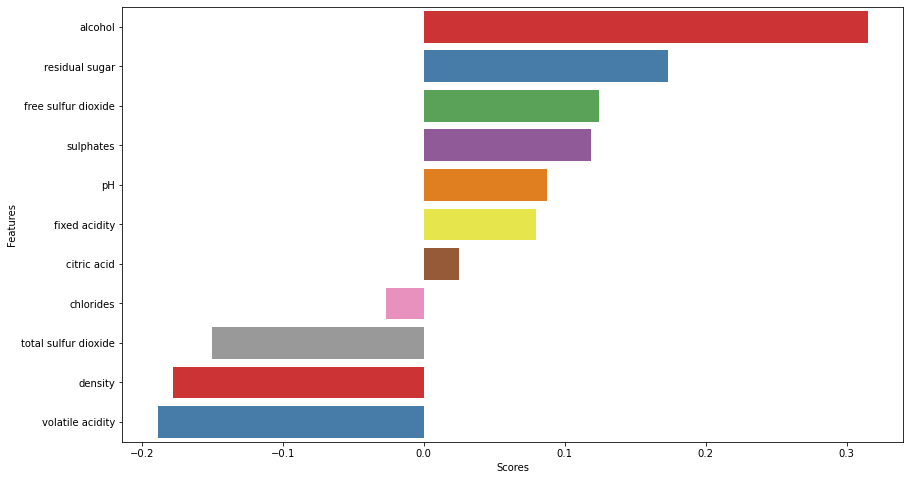

In [41]:
plt.figure(figsize=(14,8))
sns.barplot(x='Scores', y='Features', data=df_features, palette='Set1')

- **Criando o modelo de Regressão Linear com as variáveis originais retirando algumas colunas menos relevantes**

In [42]:
# Speração dos dados entre variáveis(features) e resposta(target) excluindo as colunas criadas na análise e duas com menos relevância
X = df.drop(['quality', 'classification', 'IQR total sulfur dioxide', 'citric acid', 'fixed acidity'], axis = 1) #eliminando a target do X
y = df['quality']

In [43]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [44]:
#Normalização
# Define como será feito a normalização
scaler = StandardScaler()

# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [45]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [46]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [47]:
# Visualizando as predições
y_pred

array([6.48340119, 6.18995178, 6.14651151, ..., 5.25430789, 5.44787117,
       6.69804605])

- **AVALIAÇÃO**

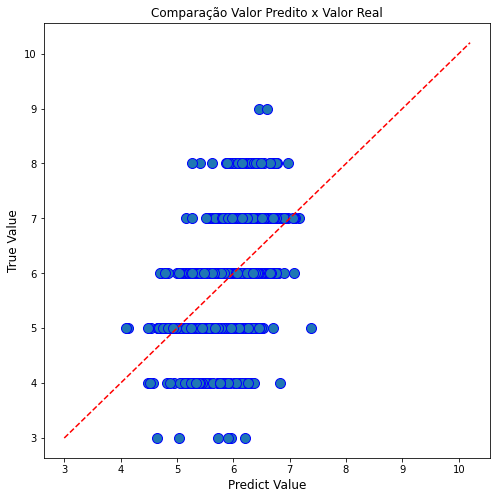

In [48]:
#Gráfico comparando o Valor Real com o Predito
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()


In [49]:
# Print das Métricas
#Nota-se que o R2 não teve melhoras
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    0.553
Erro Quadrãtico Médio:  0.516
R^2:                    0.311


- **Criando o modelo de Regressão Linear com as variáveis originais acrescido das variáveis criadas durante a análise dos dados**

In [50]:
# Speração dos dados entre variáveis(features) e resposta(target)
X = df.drop(['quality'], axis = 1) #eliminando a target do X
y = df['quality']

In [51]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [52]:
#Normalização
# Define como será feito a normalização
scaler = StandardScaler()

# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [53]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [54]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [55]:
# Visualizando as predições
y_pred

array([5.99364036, 6.0048796 , 6.01410573, ..., 4.94639416, 4.93738261,
       7.08435571])

- **Avaliação**

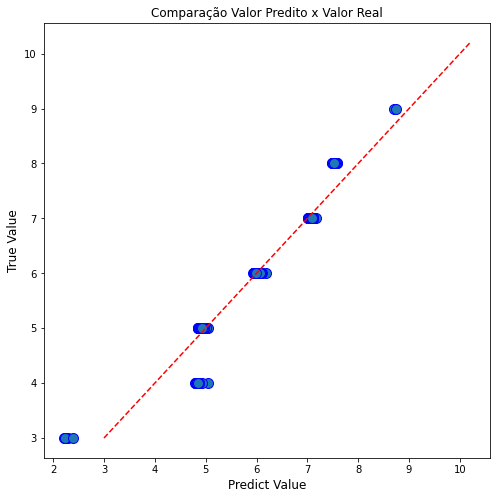

In [56]:
#Gráfico comparando o Valor Real com o Predito
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [57]:
# Print das Métricas
#Nota-se que o R2 não teve melhoras
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3)) 

Métricas para a Previsão:
Erro Absoluto Médio:    0.094
Erro Quadrãtico Médio:  0.037
R^2:                    0.95


>- **Conclusão:**<br>
O modelo original, onde apenas apaguei os dados duplicados, retornou uma acurácia de apenas 0,311 enquanto quando incluiu-se apenas duas variáveis, que criamos durante a análise de dados, bem correlacionadas obteve-se uma acurácia bastante relevante de 0.95 obtendo uma significativa melhora no modelo.


### - MODELO DE REGRESSÃO LOGISTICA(CLASSIFICAÇÃO)

In [58]:
#criação de uma coluna avaliando a qualidade do vinho(Variável qualitativa)
df['evaluation'] = df['quality'].apply(lambda x: 'bom' if x >= 6 else 'ruim')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classification,IQR total sulfur dioxide,evaluation
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,97.0,ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,97.0,ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,97.0,ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,78.0,bom
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,97.0,ruim


In [59]:
#Selecionando as variáveis com maior relevancia em relação a target 'quality' e que medem componentes químicos do vinho
X = df.drop(['evaluation', 'classification', 'IQR total sulfur dioxide',
             'quality', 'residual sugar', 'pH', 'sulphates','fixed acidity', 'citric acid'], axis = 1)

# Separa a target
y = df['evaluation']

In [60]:
display(X, y)

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol
0,0.70,0.076,11.0,34.0,0.99780,9.4
1,0.88,0.098,25.0,67.0,0.99680,9.8
2,0.76,0.092,15.0,54.0,0.99700,9.8
3,0.28,0.075,17.0,60.0,0.99800,9.8
5,0.66,0.075,13.0,40.0,0.99780,9.4
...,...,...,...,...,...,...
4893,0.21,0.039,24.0,92.0,0.99114,11.2
4894,0.32,0.047,57.0,168.0,0.99490,9.6
4895,0.24,0.041,30.0,111.0,0.99254,9.4
4896,0.29,0.022,20.0,110.0,0.98869,12.8


0       ruim
1       ruim
2       ruim
3        bom
5       ruim
        ... 
4893     bom
4894    ruim
4895     bom
4896     bom
4897     bom
Name: evaluation, Length: 5318, dtype: object

In [61]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #train_size=0.7

In [62]:
#Normalização
# Define como será feito a normalização
scaler = StandardScaler()

In [63]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [64]:
display(X_train, X_train_std)

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol
4498,0.200,0.052,22.0,106.0,0.99350,10.8
2418,0.410,0.032,25.0,98.0,0.99274,9.5
494,0.390,0.051,28.0,91.0,0.99520,12.1
2201,0.280,0.051,23.0,147.0,0.99400,10.3
2697,0.180,0.043,16.0,104.0,0.99216,10.8
...,...,...,...,...,...,...
2073,0.270,0.045,57.0,189.0,0.99530,9.8
2926,0.155,0.028,13.0,59.0,0.98975,11.9
4753,0.160,0.032,35.0,100.0,0.99076,12.0
4797,0.330,0.043,28.0,93.0,0.98970,12.3


array([[-0.85702453, -0.11213749, -0.45386245, -0.1634028 , -0.3546751 ,
         0.21870097],
       [ 0.39786726, -0.71515093, -0.28758967, -0.30368511, -0.61687709,
        -0.87656193],
       [ 0.27835376, -0.14228817, -0.12131689, -0.42643213,  0.23182933,
         1.31396386],
       ...,
       [-1.09605153, -0.71515093,  0.26665294, -0.26861453, -1.29998225,
         1.22971287],
       [-0.08018675, -0.38349354, -0.12131689, -0.39136156, -1.66568502,
         1.48246585],
       [-0.13994351,  0.9732867 , -1.00810506, -1.68897296,  0.40433064,
        -0.118303  ]])

In [65]:
# Instanciando o modelo
model = LogisticRegression()

In [66]:
# Fit do Modelo, ajustar o modelo
model.fit(X_train, y_train) # o modelo está treinado

LogisticRegression()

In [67]:
# Predições para a base de teste
y_pred = model.predict(X_test)
y_proba =  model.predict_proba(X_test)

In [68]:
y_pred

array(['bom', 'bom', 'bom', ..., 'ruim', 'ruim', 'bom'], dtype=object)

In [69]:
y_proba

array([[0.94278517, 0.05721483],
       [0.86971043, 0.13028957],
       [0.82453263, 0.17546737],
       ...,
       [0.34214213, 0.65785787],
       [0.47985714, 0.52014286],
       [0.96139765, 0.03860235]])

- **Avaliação do modelo**

In [70]:
# Classification Report dos Resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bom       0.77      0.84      0.80      1002
        ruim       0.68      0.58      0.63       594

    accuracy                           0.74      1596
   macro avg       0.73      0.71      0.72      1596
weighted avg       0.74      0.74      0.74      1596



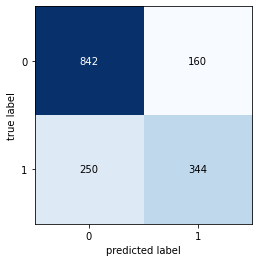

In [71]:
# Define a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Cria o plot da matriz de confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o gráfico
plt.show()

-**Conclusão:**

Concluiu-se que, retirando algumas variáveis menos relevantes,  obtemos uma precisão de 77% nos vinhos classificados como bons e 68% dos vinhos classificados como ruins, sendo uma previsão bastante considerável.